In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [22]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:])
    y_train = np.array(train_dataset["Y_train"][:])

    test_dataset = h5py.File('testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:])
    y_test = np.array(test_dataset["Y_test"][:])

    return X_train, y_train, X_test, y_test

In [101]:

from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss

# n0 correspond au nombre de parametres d entrée
# n1 represente le nombre de neurones dans la hidden layer
# n2  correspond a la taille de y (de sortie)
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    print("W1 shape : ", W1.shape)
    print("b1 shape : ", b1.shape)
    print("W2 shape : ", W2.shape)
    print("b2 shape : ", b2.shape)

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    # Forward propagation
    Z1 = W1.dot(X) + b1  # b1 will be broadcasted to (32, 1000)
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2  # b2 will be broadcasted to (1, 1000)
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations


def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

    return gradients

def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return (A2 >= 0.5).astype(float);

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from tqdm import tqdm
from matplotlib.colors import ListedColormap

# Define your neural_network function with decision boundary plotting
def neural_network(X, y, n1=32, learning_rate=0.1, n_iter=1000):

    # Initialisation des paramètres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # Gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))

        history.append([parametres.copy(), train_loss, train_acc, i])

        # Mise à jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)

    # Courbes d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.legend()
    plt.show()

    return parametres



#Import des données

In [82]:
X_train, y_train, X_test, y_test =load_data()

In [83]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [84]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0., 1.]), array([500, 500]))
(array([0., 1.]), array([100, 100]))


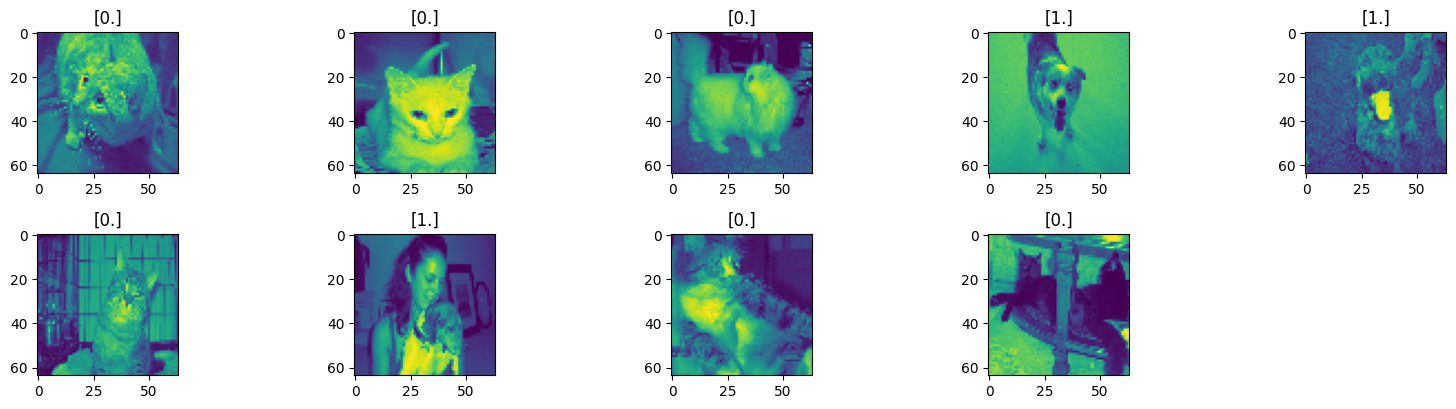

In [85]:
plt.figure(figsize=(16,8))
for i in range(1,10):
  plt.subplot(4, 5, i)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.tight_layout() #To make the title show better
plt.show()

#Modele
Nos entrées sont des images. Chaque image est consituée de n pixels. On peut alors traiter chaque pixel comme étant une variales. Donc nous aurons n variables et n poids.
Il faut tout d'abord aplatir notre image en un vecteur de variables (matrice -> vacteur)

In [86]:
X_train_flat=(X_train.reshape(X_train.shape[0],-1)/X_train.max()).T
X_test_flat=(X_test.reshape(X_test.shape[0],-1)/X_test.max()).T

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

print(X_train_flat.shape)
print(y_train.shape)
print(X_test_flat.shape)
print(y_test.shape)

(4096, 1000)
(1, 1000)
(4096, 200)
(1, 200)


W1 shape :  (32, 4096)
b1 shape :  (32, 1)
W2 shape :  (1, 32)
b2 shape :  (1, 1)


100%|██████████| 1000/1000 [01:44<00:00,  9.54it/s]


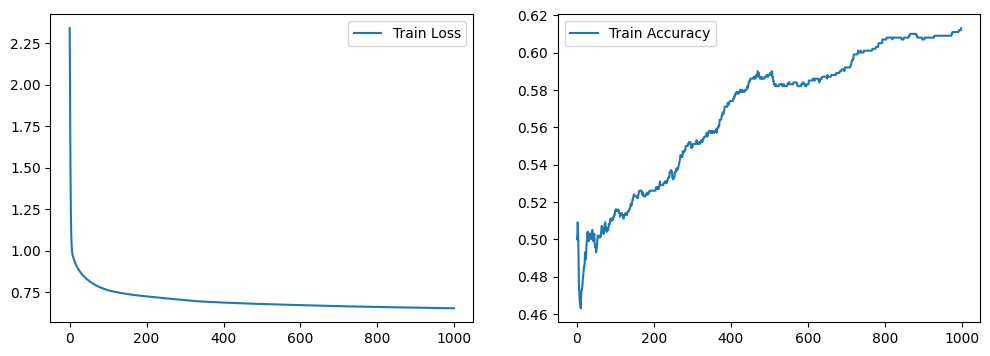

In [87]:
parametres = neural_network(X_train_flat, y_train, n1=32)

In [109]:
y_pred=predict(X_test_flat, parametres)

In [106]:
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten()


In [107]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_flat, y_pred_flat)


In [108]:
accuracy

0.515

In [110]:
y_pred_train = predict(X_train_flat , parametres)
y_pred_train_flat = y_pred_train.flatten()
y_train_flat = y_train.flatten()
accuracy_train = accuracy_score(y_train_flat, y_pred_train_flat)

In [111]:
accuracy_train

0.613

#Modele 2

W1 shape :  (64, 4096)
b1 shape :  (64, 1)
W2 shape :  (1, 64)
b2 shape :  (1, 1)


100%|██████████| 1000/1000 [02:51<00:00,  5.85it/s]


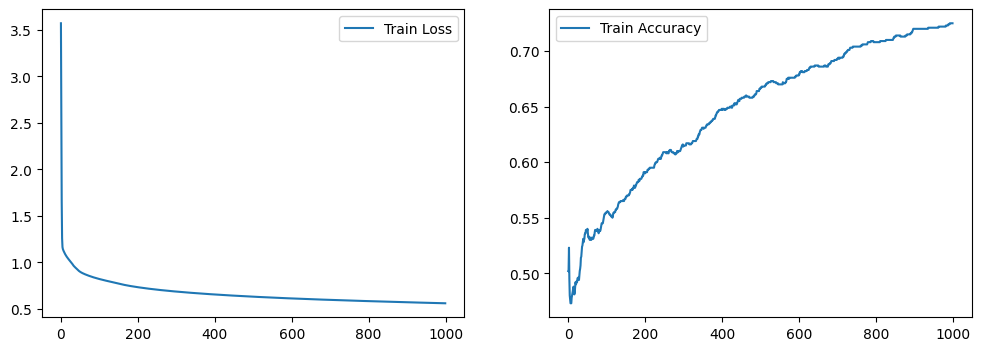

In [112]:
parametres = neural_network(X_train_flat, y_train, n1=64)

In [113]:
y_pred=predict(X_test_flat, parametres)
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten()

y_pred_train = predict(X_train_flat , parametres)
y_pred_train_flat = y_pred_train.flatten()
y_train_flat = y_train.flatten()
accuracy_train = accuracy_score(y_train_flat, y_pred_train_flat)

accuracy = accuracy_score(y_test_flat, y_pred_flat)
accuracy_train = accuracy_score(y_train_flat, y_pred_train_flat)


In [114]:
print(accuracy)

0.56


In [115]:
print(accuracy_train)

0.725
